## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings; warnings.filterwarnings("ignore")

## Read Data

In [2]:
data_path = '../data/'

demo = pd.read_csv(data_path+"LPOINT_BIG_COMP_01_DEMO.csv")      
clac = pd.read_csv(data_path+"LPOINT_BIG_COMP_04_PD_CLAC.csv")       
br = pd.read_csv(data_path+"LPOINT_BIG_COMP_05_BR.csv")     
pdde = pd.read_csv(data_path+"LPOINT_BIG_COMP_02_PDDE.csv")    
cop = pd.read_csv(data_path+"LPOINT_BIG_COMP_03_COP_U.csv")               
lpay = pd.read_csv(data_path+"LPOINT_BIG_COMP_06_LPAY.csv")         

## Demo
- 40대 고객이 많고 70대 고객은 압도적으로 적다.
- 연령대별 성별 비율 차이는 없다.
- `ages`와 `zon_hlv`는 구매데이터에 병합해야 한다.

In [3]:
'''
고객 데모 정보 
- cust: 고객ID
- ma_fem_dv: 성별(남성/여성)
- ages: 연령대(20대~70대)
- zon_hlv: 거주지(17개의 구역, Z01~Z17)
'''
demo

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


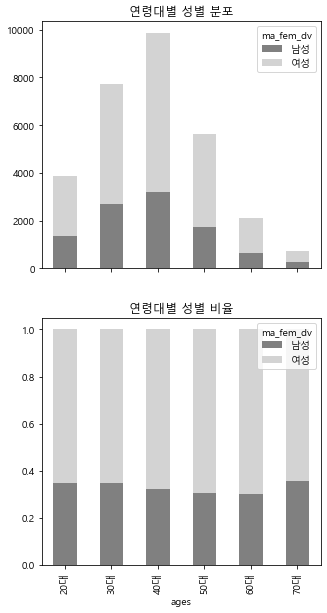

In [4]:
fig, ax = plt.subplots(2,1,figsize=(5,10), sharex=True)
ease = pd.pivot_table(demo, index='ages', columns='ma_fem_dv', values='cust', aggfunc=np.size, margins=True)
ease.iloc[:-1,:-1].plot.bar(title="연령대별 성별 분포", stacked=True, color=['gray','lightgray'], ax=ax[0])

ease = ease.divide(ease['All'], axis=0).iloc[:-1,:-1]
ease.plot.bar(title="연령대별 성별 비율", color=['gray','lightgray'], stacked=True, ax=ax[1])
plt.show()

In [5]:
# [DC] pdde, cop, lpay에 ages와 zon_hlv(거주지명)을 병합한다.
pdde = pdde.merge(demo[['cust','ages','zon_hlv']].rename(columns={'zon_hlv':'home'}), on='cust')
print('pdde 데이터 크기:', pdde.shape)

cop = cop.merge(demo[['cust','ages','zon_hlv']].rename(columns={'zon_hlv':'home'}), on='cust')
print('cop 데이터 크기:', cop.shape)

lpay = lpay.merge(demo[['cust','ages','zon_hlv']].rename(columns={'zon_hlv':'home'}), on='cust')
print('lpay 데이터 크기:', lpay.shape)

pdde 데이터 크기: (4381743, 12)
cop 데이터 크기: (248304, 11)
lpay 데이터 크기: (353184, 9)


## Clac
- pd_c를 사용해 `pd_nm`을 병합해야 한다.

In [6]:
'''
유통사 상품 카테고리 마스터
- pd_c: 상품코드
- pd_nm: 상품소분류명
- clac_hlv_nm: 상품대분류명
- clac_mcls_nm: 상품중분류명
'''
clac

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [7]:
# 의약품, 과일선물세트, 스포츠용품, 보험, 렌탈수수료, 임대매출, 담배, 교육보조재, 악기, 오토바이 등 
# 다양한 상품이 나타나는 걸 보아 여러 종류의 Lotte 계열사 데이터가 섞인 것 같다.
clac.clac_mcls_nm.unique()

array(['거실가구', '기타가구', '사무용/학생용가구', '수납가구', '시공/DIY가구', '야외용가구', '유아동가구',
       '주방가구', '침실가구', '건강보조식품', '건강진액', '꿀', '영양제', '홍삼/인삼가공식품', '건강가전',
       '건강관리용품', '건강측정용품', '안마/찜질용품', '일반의약외품', '일반의약품', '건어물',
       '건해산물선물세트', '반건생선', '해조류', '난방가전', '냉방가전', '공구', '보수용품', '안전용품',
       '전기용품', '건과일', '견과류', '과일선물세트', '국산과일', '냉동과일', '수입과일', '간식/안주형과자',
       '과자세트', '껌', '비스킷류', '사탕/캔디', '스낵류', '전통과자류', '초콜릿', '파이류', '골프',
       '기타구기/필드스포츠', '농구', '배구', '배드민턴', '야구', '축구', '탁구', '테니스', '보험',
       '기타', '기프트', '렌탈수수료', '소모품', '용기보증금', '임대매출', '특판', '남성의류상의',
       '남성의류세트', '남성의류아우터', '남성의류전신', '남성의류하의', '남성특수목적의류', '남성특수소재의류',
       '냉동간편식', '아이스크림', '냉장/냉동고', '세탁기', '냉장간편식', '냉장음료', '디저트', '어묵/맛살',
       '포장반찬', '햄/소시지', '일반담배', '전자담배', '특수담배', '건면', '레토르트', '봉지라면',
       '분말조리식', '빵', '시리얼', '용기라면', '모바일기기', '모바일액세서리', '교육보조재', '노트',
       '미술용품', '사무기기', '사무용지/서식지', '일반문구/사무용품', '파티/팬시용품', '필기도구',
       '농산물병통조림', '병통조림선물세트', '수산물통조림', '잼', '축산물통조림', '모바일상품권',
       

In [8]:
# [DC] 상품코드가 있는 pdde에 pd_nm을 병합한다.
pdde = pdde.merge(clac[['pd_c','pd_nm']], on='pd_c')
print('pdde 데이터 크기:', pdde.shape)

pdde 데이터 크기: (4381743, 13)


## Br
- Z10, Z17에 주로 많이 있다. Z16, Z06, Z13은 인구가 많음에도 점포가 적다.
- A04의 점포가 압도적으로 많다. 추후 상품코드(clac)와 병합해 각 제휴사가 파는 상품을 확인해보아야 한다.
- br_c를 사용해 구매데이터에 zon_hlv를 병합해야 한다. 

In [9]:
'''
유통사/제휴사 점포 마스터
- br_c: 점포코드
- cop_c: 제휴사 코드
- zon_hlv: 지역대분류코드
- zon_mcls: 점포중분류코드
'''
br

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005
...,...,...,...,...
8803,E010040,E01,Z17,Z17024
8804,E010041,E01,Z16,Z16005
8805,E010042,E01,Z17,Z17021
8806,E010043,E01,Z10,Z10035


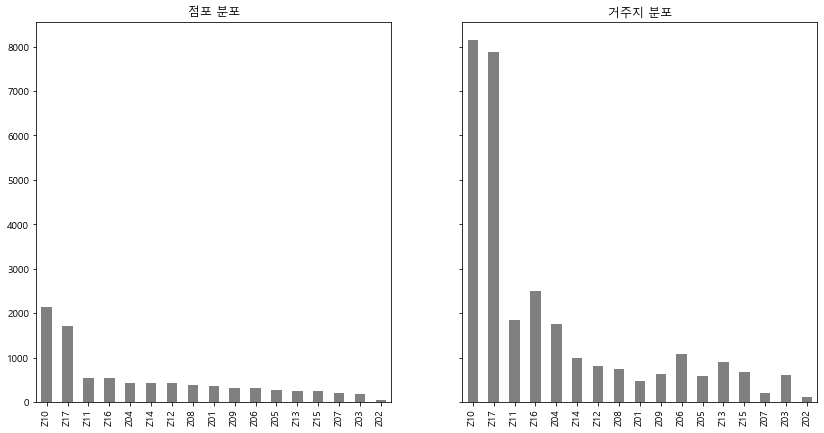

In [10]:
fig, ax = plt.subplots(1,2, figsize=(14,7), sharey=True)
ease = br.zon_hlv.value_counts()
ease.plot.bar(title="점포 분포", color='gray', ax=ax[0])
demo.zon_hlv.value_counts().loc[ease.index].plot.bar(title="거주지 분포", color='gray', ax=ax[1])
plt.show()

In [11]:
br.cop_c.value_counts()

A04    5646
D01    1311
D02     535
A03     487
A05     440
C01     140
A02     116
A01      66
E01      43
B01      20
C02       4
Name: cop_c, dtype: int64

In [12]:
# [DC] pdde와 cop엔 br_c가 있음으로 zon_hlv(매장위치), zon_cnt(지역내 점포수)를 병합한다.
br = br.merge(br.groupby(['cop_c','zon_hlv'])['zon_mcls'].nunique().rename('zon_cnt').reset_index(),
              on=['cop_c','zon_hlv'])

pdde = pdde.merge(br[['br_c','zon_hlv','zon_cnt']].rename(columns={'zon_hlv':'store'}), on='br_c', how='left')
print('pdde 데이터 크기:', pdde.shape)

cop = cop.merge(br[['br_c','zon_hlv','zon_cnt']].rename(columns={'zon_hlv':'store'}), on='br_c', how='left')
print('cop 데이터 크기:', cop.shape)

pdde 데이터 크기: (4381743, 15)
cop 데이터 크기: (248304, 13)


## `Pdde`
- 대량구매 고객이 있다. 이상치로 구분할 지 논의해야 한다.

In [13]:
'''
유통사 상품 구매 내역
- rct_no: 장바구니 식별 번호(cop, lpay의 rct_no와 다른 값이다.)
- chnl_dv: 오프라인|온라인 구매여부(binary data, 1|2)
- cop_c: 제휴사 코드(A01~A06: 유통사, 가령 롯데백화점, 세븐일레븐 같은 것이다.)
- pd_c: 상품코드
- br_c: 구매 점포 구분 코드(428501개의 결측치 존재)
- de_dt: 2021년 동안의 데이터(20210101~20211231)
- de_hr: 24시간 영업(0~23)
'''
pdde

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ages,home,clac_mcls_nm,store,zon_cnt
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,50대,Z17,남성의류상의,Z10,15.0
1,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,50대,Z17,남성의류상의,Z10,15.0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,50대,Z17,남성의류상의,Z10,15.0
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,50대,Z17,남성의류상의,Z10,15.0
4,M646853852,A01269523084,1,A01,A010025,PD0290,20210716,20,20000.0,1,40대,Z13,남성의류상의,Z13,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M057015266,A04011192485,1,A04,A043075,PD0514,20210215,17,5000.0,1,40대,Z10,지류상품권,Z10,46.0
4381739,M057015266,A04037050987,1,A04,A043075,PD0514,20210512,20,10000.0,1,40대,Z10,지류상품권,Z10,46.0
4381740,M057015266,A04037050987,1,A04,A043075,PD0514,20210512,20,10000.0,1,40대,Z10,지류상품권,Z10,46.0
4381741,M057015266,A04037050987,1,A04,A043075,PD0514,20210512,20,10000.0,1,40대,Z10,지류상품권,Z10,46.0


In [14]:
# br_c에 결측치가 있어 store, zon_cnt에도 결측치가 있는 상황이다. 결측치는 온라인 데이터를 의미한다.
display(pdde.isna().sum())

# 결측치는 온라인 데이터를 의미한다.
print(pdde[pdde.br_c.isna()].chnl_dv.unique())

cust                 0
rct_no               0
chnl_dv              0
cop_c                0
br_c            428501
pd_c                 0
de_dt                0
de_hr                0
buy_am               0
buy_ct               0
ages                 0
home                 0
clac_mcls_nm         0
store           428501
zon_cnt         428501
dtype: int64

[2]


In [15]:
# [DC] br_c와 store은 'ONLINE'으로, zon_cnt는 0으로 결측치를 채운다.
pdde[['br_c','store']].fillna('ONLINE', inplace=True)
pdde['zon_cnt'].fillna(0, inplace=True)

In [16]:
print('분석 기간:', pdde.de_dt.min(), '~', pdde.de_dt.max())

분석 기간: 20210101 ~ 20211231


In [17]:
# [DC] 구매일자, 구매월, 구매요일, 주말여부 column도 생성한다.
pdde['de_dt'] = pd.to_datetime(pdde['de_dt'], format='%Y%m%d')
pdde['date'] = pd.to_datetime(pdde['de_dt'].astype(str)+' '+pdde['de_hr'].astype(str).str.zfill(2))
pdde['de_month'] = pdde['de_dt'].dt.month
pdde["consum_day"] = pdde["de_dt"].dt.weekday
pdde["weekend"] = pdde["consum_day"].apply(lambda x : 1 if x >= 5 else 0)

In [18]:
# [DC] 공휴일 column을 생성한다.
holiday_list = ['20210101', '20210211', '20210212', '20210213', '20210301',
                '20210505', '20210519', '20210606', '20210815', '20210920',
                '20210921', '20210922', '20211003', '20211009', '20211225']
pdde["holiday"] = pdde["de_dt"].astype(str).apply(lambda x : 1 if x in holiday_list else 0)
display(pdde.sample(5))

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ages,home,clac_mcls_nm,store,zon_cnt,date,de_month,consum_day,weekend,holiday
3300389,M743730879,A02202090230,1,A02,A020058,PD1241,2021-02-09,11,3780.0,1,50대,Z10,냉장조리,Z10,23.0,2021-02-09 11:00:00,2,1,0,0
4005054,M967652171,A01001534524,1,A01,A010004,PD0977,2021-01-02,17,240000.0,1,50대,Z16,여성특수소재의류,Z16,5.0,2021-01-02 17:00:00,1,5,1,0
373914,M558365828,A02338723635,1,A02,A020107,PD1160,2021-10-02,11,3980.0,1,40대,Z05,유가공품,Z05,4.0,2021-10-02 11:00:00,10,5,1,0
3279137,M732442496,A04073073445,1,A04,A045319,PD1243,2021-08-09,12,1400.0,1,30대,Z14,냉장조리,Z14,8.0,2021-08-09 12:00:00,8,0,0,0
2454086,M940642317,A03012053663,1,A03,A030017,PD0404,2021-10-08,12,4280.0,1,20대,Z17,봉지라면,Z17,23.0,2021-10-08 12:00:00,10,4,0,0


In [19]:
# 구매금액이 큰 30건은 19명의 고객이 구매한 명품, 주얼리 구매에 해당한다.
# pdde.sort_values(by='buy_am', ascending=False).iloc[:30]
print('큰 손 고객:', pdde.sort_values(by='buy_am', ascending=False).iloc[:30].cust.nunique())

큰 손 고객: 20


In [20]:
# 1회 구매시 여러 종류를 여러 개 사가는 거래가 이루어졌다.
display(pdde.groupby('rct_no')['buy_ct'].agg([np.size, sum]).sort_values(by='size', ascending=False))


# 상위 5개만 조사해본 결과 동일한 사람이 동일한 날, 동일 시간에 대량으로 구매한 듯 보인다.
display(pdde.query('rct_no == "A02090597964"').apply(pd.Series.nunique))
# pdde.query('rct_no == "A02237644368"').apply(pd.Series.nunique)
# pdde.query('rct_no == "A02350722306"').apply(pd.Series.nunique)
# pdde.query('rct_no == "A02232705930"').apply(pd.Series.nunique)
# pdde.query('rct_no == "A02018116148"').apply(pd.Series.nunique)

,size,sum
rct_no,,
A02090597964,109,119
A02237644368,93,93
A02350722306,91,146
A02018116148,82,89
A02200575126,82,121
...,...,...
A01168101496,1,1
A01168100004,1,1
A01168099740,1,1


cust             1
rct_no           1
chnl_dv          1
cop_c            1
br_c             1
pd_c            75
de_dt            1
de_hr            1
buy_am          72
buy_ct           3
ages             1
home             1
clac_mcls_nm    46
store            1
zon_cnt          1
date             1
de_month         1
consum_day       1
weekend          1
holiday          1
dtype: int64

## `Cop`
`[질문]` 날짜 정보를 활용하고자 하면 예약일자(de_dt)를 사용해야 할까, 방문일자(vst_dt)를 사용해야 할까?
- 방문할 일자를 생각하고 선결제하는 것으로 방문일자를 사용해야 한다.
- 방문일자와 예약일자간 간격으로 고객의 성향 분석은 가능할 수 있다.

In [21]:
'''
제휴사 서비스 이용 내역
- rct_no: 구매 고유 식별코드(pdde, lpay의 rct_no와 다른 값이다.)
- cop_c: 제휴사 코드(B01: 숙박, C01 ~ C02: 엔터테인먼트, D01 ~ 02: F&B(Food&Beverage), E01: 랜탈)
- br_c: 점포 코드(55개의 결측치 존재)
- chnl_dv: 오프라인|온라인 여부(binary data, 1|2)
- de_dt: 이용일자(결제일자)
- vst_dt: 방문일자
'''
cop

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,ages,home,store,zon_cnt
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,70대,Z17,Z17,6.0
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,70대,Z17,Z17,6.0
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,70대,Z17,Z17,6.0
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,70대,Z17,Z17,6.0
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,70대,Z17,Z17,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M321652667,21092413D013710723,D01,D010143,1,20210924,20210924,13,16400,20대,Z13,Z13,5.0
248300,M321652667,21101812D023790496,D02,D020245,1,20211018,20211018,12,9100,20대,Z13,Z17,23.0
248301,M736929241,21091422C014625802,C01,C010011,2,20210914,20210915,22,26000,20대,Z17,Z17,17.0
248302,M040608978,21102916C024520111,C02,C020002,1,20211029,20211029,16,27500,20대,Z04,Z17,1.0


In [22]:
# pdde와 동일하게 온라인 데이터가 br_c의 결측을 만든다.
display(cop.isna().sum())
print(cop[cop.br_c.isna()].chnl_dv.unique())

cust        0
rct_no      0
cop_c       0
br_c       55
chnl_dv     0
de_dt       0
vst_dt      0
de_hr       0
buy_am      0
ages        0
home        0
store      55
zon_cnt    55
dtype: int64

[2]


In [23]:
# [DC] br_c와 store은 'ONLINE'으로, zon_cnt는 0으로 결측치를 채운다.
cop[['br_c','store']].fillna('ONLINE', inplace=True)
cop['zon_cnt'].fillna(0, inplace=True)

In [24]:
# pdde와 달리 2020년 말의 거래도 포함되어 있다.# pdde와 달리 2020년 말의 거래도 포함되어 있다.
print('분석 기간:', cop.de_dt.min(), '~', cop.de_dt.max())

# [DC] 공휴일 column을 생성한다.
holiday_list = ['2021-01-01', '2021-02-11', '2021-02-12', '2021-02-13', '2021-03-01',
                '2021-05-05', '2021-05-19', '2021-06-06', '2021-08-15', '2021-09-20',
                '2021-09-21', '2021-09-22', '2021-10-03', '2021-10-09', '2021-12-25']
cop["holiday"] = cop["vst_dt"].apply(lambda x : 1 if x in holiday_list else 0)

# [DC] 구매일자, 구매월, 구매요일, 주말여부 column도 생성한다.
cop['vst_dt'] = pd.to_datetime(cop['vst_dt'], format='%Y%m%d')
cop['date'] = pd.to_datetime(cop['vst_dt'].astype(str)+' '+cop['de_hr'].astype(str).str.zfill(2))
cop['de_month'] = cop['vst_dt'].dt.month
cop["consum_day"] = cop["vst_dt"].dt.weekday
cop["weekend"] = cop["consum_day"].apply(lambda x : 1 if x >= 5 else 0)
display(cop.sample(5))
print('분석 기간:', cop.de_dt.min(), '~', cop.de_dt.max())

분석 기간: 20201227 ~ 20211231


,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,ages,home,store,zon_cnt,holiday,date,de_month,consum_day,weekend
174374,M633706006,21021909B012390190,B01,B010007,1,20210219,2021-02-19,9,90750,30대,Z17,Z15,1.0,0,2021-02-19 09:00:00,2,4,0
6291,M465534861,21120414D023436977,D02,D020379,1,20211204,2021-12-04,14,3300,50대,Z10,Z11,19.0,0,2021-12-04 14:00:00,12,5,1
103242,M684754936,21062618C010333094,C01,C010014,1,20210626,2021-06-26,18,3000,40대,Z17,Z17,17.0,0,2021-06-26 18:00:00,6,5,1
199030,M634938834,21111710D011225782,D01,D010569,1,20211117,2021-11-17,10,2500,20대,Z16,Z16,16.0,0,2021-11-17 10:00:00,11,2,0
191923,M487185362,21022420D011178004,D01,D010729,1,20210224,2021-02-24,20,7400,40대,Z08,Z17,25.0,0,2021-02-24 20:00:00,2,2,0


분석 기간: 20201227 ~ 20211231


In [25]:
# [DC] 구매일자, 구매월, 구매요일, 주말여부 column도 생성한다.
cop['vst_dt'] = pd.to_datetime(cop['vst_dt'], format='%Y%m%d')
cop['date'] = pd.to_datetime(cop['vst_dt'].astype(str)+' '+cop['de_hr'].astype(str).str.zfill(2))
cop['de_month'] = cop['vst_dt'].dt.month
cop["consum_day"] = cop["vst_dt"].dt.weekday
cop["weekend"] = cop["consum_day"].apply(lambda x : 1 if x >= 5 else 0)

In [26]:
# [DC] 공휴일 column을 생성한다.
holiday_list = ['20210101', '20210211', '20210212', '20210213', '20210301',
                '20210505', '20210519', '20210606', '20210815', '20210920',
                '20210921', '20210922', '20211003', '20211009', '20211225']
cop["holiday"] = cop["vst_dt"].astype(str).apply(lambda x : 1 if x in holiday_list else 0)
display(cop.sample(5))

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,ages,home,store,zon_cnt,holiday,date,de_month,consum_day,weekend
69039,M800016326,21080312D020020584,D02,D020168,1,20210803,2021-08-03,12,2650,40대,Z16,Z16,13.0,0,2021-08-03 12:00:00,8,1,0
15812,M592087112,21112615C010916280,C01,C010011,1,20211126,2021-11-26,15,10000,50대,Z17,Z17,17.0,0,2021-11-26 15:00:00,11,4,0
79993,M988172932,21112816B015043950,B01,B010017,1,20211128,2021-11-28,16,48000,30대,Z06,Z08,1.0,0,2021-11-28 16:00:00,11,6,1
95100,M702345614,21092216D020717210,D02,D020388,1,20210922,2021-09-22,16,13000,50대,Z10,Z03,5.0,0,2021-09-22 16:00:00,9,2,0
162581,M937737168,21100200D015017780,D01,D011030,1,20211002,2021-10-02,0,19400,20대,Z17,Z17,25.0,0,2021-10-02 00:00:00,10,5,1


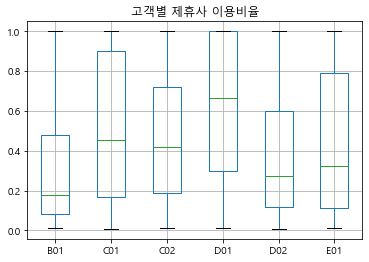

In [27]:
# 대부분 D01을 높은 비율로 이용하며 특정 제휴사만 몰아서 구매하는 고객이 있다. 
ease = pd.pivot_table(cop, index='cust', columns='cop_c', values='vst_dt', aggfunc=np.size, margins=True)
ease = ease.divide(ease['All'], axis=0).iloc[:-1,:-1]
ease.boxplot()
plt.title("고객별 제휴사 이용비율")
plt.show()

## Lpay
- 데이터 활용이 불가할 정도로 정보가 없다.

In [28]:
'''
엘페이 결제내역
- rct_no: 구매 고유 식별번호(pdde, cop의 rct_no와 다른 값이다.)
- cop_c: 제휴사 코드(L00: 기타 제휴사, L01: 비 제휴사)
'''
lpay

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ages,home
0,M629656521,210803210311226,A03,1,20210803,21,10900,40대,Z04
1,M216016456,210803130167542,L01,2,20210803,13,6860,40대,Z04
2,M216016456,211223110193654,L01,2,20211223,11,12650,40대,Z04
3,M216016456,211223120196103,L01,2,20211223,12,310,40대,Z04
4,M216016456,210401010115485,L01,2,20210401,1,1500,40대,Z04
...,...,...,...,...,...,...,...,...,...
353179,M746917810,210109180652135,A06,2,20210109,18,9610,40대,Z05
353180,M503964131,210103070181680,A01,2,20210103,7,20000,40대,Z04
353181,M425271048,210107100537738,A05,2,20210107,10,89000,30대,Z08
353182,M113930483,210113130040944,L00,2,20210113,13,225350,40대,Z10


In [29]:
# pdde와 동일하다.
print('분석 기간:', lpay.de_dt.min(), '~', lpay.de_dt.max())

분석 기간: 20210101 ~ 20211231


In [30]:
# [DC] 구매일자, 구매월, 구매요일, 주말여부 column도 생성한다.
lpay['de_dt'] = pd.to_datetime(lpay['de_dt'], format='%Y%m%d')
lpay['date'] = pd.to_datetime(lpay['de_dt'].astype(str)+' '+lpay['de_hr'].astype(str).str.zfill(2))
lpay['de_month'] = lpay['de_dt'].dt.month
lpay["consum_day"] = lpay["de_dt"].dt.weekday
lpay["weekend"] = lpay["consum_day"].apply(lambda x : 1 if x >= 5 else 0)

In [31]:
# [DC] 공휴일 column을 생성한다.
holiday_list = ['20210101', '20210211', '20210212', '20210213', '20210301',
                '20210505', '20210519', '20210606', '20210815', '20210920',
                '20210921', '20210922', '20211003', '20211009', '20211225']
lpay["holiday"] = lpay["de_dt"].astype(str).apply(lambda x : 1 if x in holiday_list else 0)
display(lpay.sample(5))

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ages,home,date,de_month,consum_day,weekend,holiday
152226,M383524600,211215180161156,C01,2,2021-12-15,18,14000,40대,Z11,2021-12-15 18:00:00,12,2,0,0
209677,M662525401,210316020683433,A06,2,2021-03-16,2,62850,40대,Z17,2021-03-16 02:00:00,3,1,0,0
117490,M795101836,211205170132514,D01,1,2021-12-05,17,14220,40대,Z17,2021-12-05 17:00:00,12,6,1,0
329081,M801991664,210111190112109,A01,1,2021-01-11,19,10000,30대,Z15,2021-01-11 19:00:00,1,0,0,0
307371,M875953637,210426080159997,L01,2,2021-04-26,8,83820,20대,Z04,2021-04-26 08:00:00,4,0,0,0


### ※ rct_no
pdde, cop, lpay에 동일한 이름의 rct_no가 있으나 각각 다른 값을 담고있다.
- Pdde
  - 오프라인 거래이면 A, 온라인 거래면 E로 시작한다. 이후 cop_c의 숫자가 이어진다.
    ```python
(pdde['rct_no'].str[:3]==(pdde['chnl_dv'].apply(lambda x: "A" if x==1 else "E")+pdde['cop_c'].str[1:])).sum()
```
- COP
  - 날짜(YYMMDD)가 오고 시간, cop_c가 온다.
  ```python
(cop['rct_no'].str[:11] \
 !=\
 (cop['de_dt'].astype(str).str[2:]+cop['de_hr'].astype(str).str.zfill(2)+cop['cop_c'])).sum()
```
- Lpay
  - 날짜(YYMMDD)가 오고 시간, cop_c 숫자가 온다.
    ```python
(lpay['rct_no'].astype(str).str[:10] \
 !=\
 (lpay['de_dt'].astype(str).str[2:]+lpay['de_hr'].astype(str).str.zfill(2)+lpay['cop_c'].str[1:])).sum()
```

## Save Data

In [32]:
pdde.to_csv(data_path+"DC_LPOINT_PDDE.csv", index=False) 
cop.to_csv(data_path+"DC_LPOINT_COP.csv", index=False) 
lpay.to_csv(data_path+"DC_LPOINT_LPAY.csv", index=False) 